In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc
import os, pickle


In [34]:
filename = "../outputs/BER/ask_2/EbNo_1-10.pkl"
try:
    with open(filename, "rb") as f:
        results = pickle.load(f)
    [print(r) for r in results]
except FileNotFoundError:
    print(f"No results found at {filename}")


cfgs
chnl_params
ber_results
ers_cnt
metadata


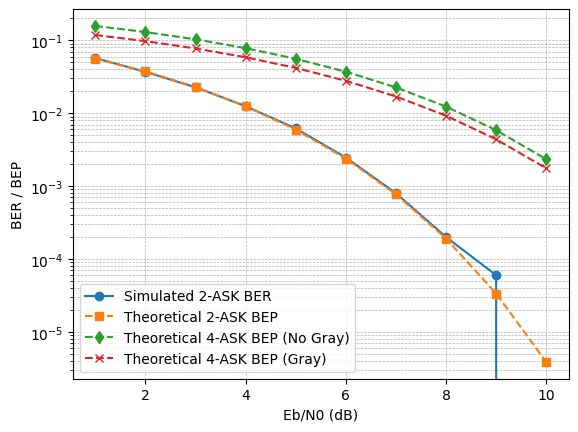

In [35]:

eb_no_db = results['chnl_params']['eb_no_db']
ber_results = results['ber_results']

# Calculate theoretical curves
# if (eb_no_db != coded_bpsk_results["eb_no_db"]).all():
#     raise ValueError("Eb/N0 values do not match between results files.")
snr_linear = 10 ** (eb_no_db / 10)
# 2-ASK (BPSK)
ber_2ask = 0.5 * erfc(np.sqrt(snr_linear))
# 4-ASK parameters
M = 4
# 4-ASK without Gray coding
ber_4ask_no_gray = 0.5 * erfc(  # type: ignore
    np.sqrt((3 * np.log2(M) / (M**2 - 1)) * snr_linear)
)
# 4-ASK with Gray coding
ber_4ask_gray = ((M - 1) / (M * np.log2(M))) * erfc(
    np.sqrt((3 * np.log2(M) / (M**2 - 1)) * snr_linear)
)

plt.semilogy(eb_no_db, ber_results, 'o-', label='Simulated 2-ASK BER')
plt.semilogy(eb_no_db, ber_2ask, 's--', label='Theoretical 2-ASK BEP')
plt.semilogy(eb_no_db, ber_4ask_no_gray, 'd--', label='Theoretical 4-ASK BEP (No Gray)')
plt.semilogy(eb_no_db, ber_4ask_gray, 'x--', label='Theoretical 4-ASK BEP (Gray)')
plt.xlabel('Eb/N0 (dB)')
plt.ylabel('BER / BEP')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()